In [1]:
from automatic_differentiation import Variable
import automatic_differentiation as ad
import graphviz
import numpy as np

In [2]:
x = Variable('x')
x

Variable(name='x')

In [3]:
f = x + 1
f

Node(name='x + 1', operation='+', operands=('x', 1))

In [4]:
f.gradient_fn(1)

((Variable(name='x'), array(1, dtype=object)),
 (Constant(name='1', value=1.0), array(1.)))

In [5]:
f.operands

(Variable(name='x'), Constant(name='1', value=1.0))

digraph {
labelloc="t"label="Evaluation graph"  phurutiyvuycppzc [shape=box, label="+"];
  phurutiyvuycppzc -> pkmvvjohcgxrgnrg;
  phurutiyvuycppzc -> jiniwqtdbilkdvlz;
  pkmvvjohcgxrgnrg [label="x"];
  jiniwqtdbilkdvlz [label="1"];
}


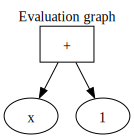

In [6]:
print(f.graph)
graphviz.Source(f.graph)

In [7]:
x = Variable('x')
y = Variable('y')
z = Variable('z')
f = ((x ** 2 + 1) - 1 / y) ** 3 + ad.log(z)
f

Node(name='(x ** 2 + 1 - 1 / y) ** 3 + log(z)', operation='+', operands=('(x ** 2 + 1 - 1 / y) ** 3', 'log(z)'))

digraph {
labelloc="t"label="Evaluation graph"  vjcgkyflfelzgsms [shape=box, label="+"];
  vjcgkyflfelzgsms -> nrtkvvlbhkhyrgyx;
  vjcgkyflfelzgsms -> yizoylcatjlhyysk;
  nrtkvvlbhkhyrgyx [shape=box, label="**"];
  nrtkvvlbhkhyrgyx -> jrrqvkbtynpsvjhu;
  nrtkvvlbhkhyrgyx -> zaxgcplozrxayagc;
  jrrqvkbtynpsvjhu [shape=box, label="-"];
  jrrqvkbtynpsvjhu -> nalqubywrvbsvxrn;
  jrrqvkbtynpsvjhu -> llrjvbvhlnomiavk;
  nalqubywrvbsvxrn [shape=box, label="+"];
  nalqubywrvbsvxrn -> gbcmabdaygmolusk;
  nalqubywrvbsvxrn -> bjsggbisoojirouy;
  gbcmabdaygmolusk [shape=box, label="**"];
  gbcmabdaygmolusk -> fgqnchhtmdgaritn;
  gbcmabdaygmolusk -> ahombtydwkbfohkj;
  fgqnchhtmdgaritn [label="x"];
  ahombtydwkbfohkj [label="2"];
  bjsggbisoojirouy [label="1"];
  llrjvbvhlnomiavk [shape=box, label="/"];
  llrjvbvhlnomiavk -> ineqhnjslrnxalyp;
  llrjvbvhlnomiavk -> aeobxwpvavizxevl;
  ineqhnjslrnxalyp [label="1"];
  aeobxwpvavizxevl [label="y"];
  zaxgcplozrxayagc [label="3"];
  yizoylcatjlhyysk [sh

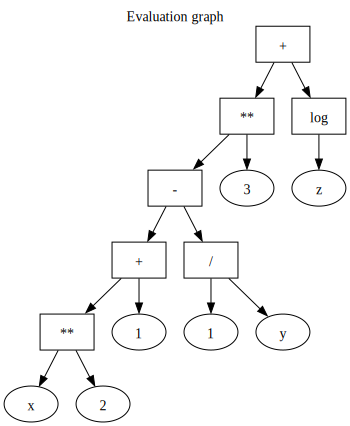

In [8]:
print(f.graph)
graphviz.Source(f.graph)

In [9]:
f.evaluate_at(x=2, y=3, z=4)

103.01592399074954

digraph {
labelloc="t"label="Evaluation graph"  vjcgkyflfelzgsms [shape=box, label="+"];
  vjcgkyflfelzgsms -> nrtkvvlbhkhyrgyx;
  vjcgkyflfelzgsms -> yizoylcatjlhyysk;
  nrtkvvlbhkhyrgyx [shape=box, label="**"];
  nrtkvvlbhkhyrgyx -> jrrqvkbtynpsvjhu;
  nrtkvvlbhkhyrgyx -> zaxgcplozrxayagc;
  jrrqvkbtynpsvjhu [shape=box, label="-"];
  jrrqvkbtynpsvjhu -> nalqubywrvbsvxrn;
  jrrqvkbtynpsvjhu -> llrjvbvhlnomiavk;
  nalqubywrvbsvxrn [shape=box, label="+"];
  nalqubywrvbsvxrn -> gbcmabdaygmolusk;
  nalqubywrvbsvxrn -> bjsggbisoojirouy;
  gbcmabdaygmolusk [shape=box, label="**"];
  gbcmabdaygmolusk -> fgqnchhtmdgaritn;
  gbcmabdaygmolusk -> ahombtydwkbfohkj;
  fgqnchhtmdgaritn [label="x"];
  ahombtydwkbfohkj [label="2"];
  bjsggbisoojirouy [label="1"];
  llrjvbvhlnomiavk [shape=box, label="/"];
  llrjvbvhlnomiavk -> ineqhnjslrnxalyp;
  llrjvbvhlnomiavk -> aeobxwpvavizxevl;
  ineqhnjslrnxalyp [label="1"];
  aeobxwpvavizxevl [label="y"];
  zaxgcplozrxayagc [label="3"];
  yizoylcatjlhyysk [sh

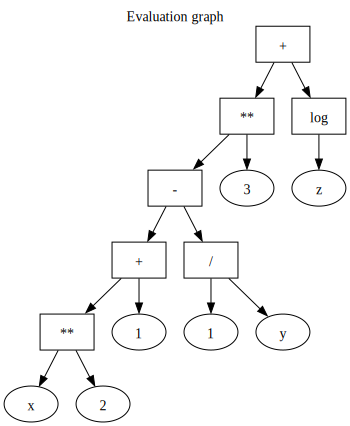

In [10]:
print(f.graph)
graphviz.Source(f.graph)

In [11]:
A = Variable('A')
B = Variable('B')
C = Variable('C')
formula = A @ B + C
print(f"f(A, B) = {formula}")
formula

f(A, B) = A @ B + C


Node(name='A @ B + C', operation='+', operands=('A @ B', 'C'))

In [12]:
A_val = np.diag([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
B_val = np.ones((10, 5))
C_val = np.random.randn(10, 5)

evaluation = formula.evaluate_at(A=A_val, B=B_val, C=C_val)
print(f"f(A, B) = \n{evaluation}")
evaluation

f(A, B) = 
[[ 0.42038053  1.21980749  1.14536648  1.98771502  1.85168693]
 [ 2.1046898   1.92958711  1.52234543  2.09496687  1.74721631]
 [ 3.55596276  2.41750722  3.51501374  3.20434538  3.11669444]
 [ 4.01354918  3.16012098  2.37890776  4.98174796  3.12879407]
 [ 5.17386785  3.88561616  5.24485007  5.28337921  4.6042177 ]
 [ 4.96646207  7.25778683  7.38870965  6.47174221  6.97336411]
 [ 5.67120091  6.49207811  5.47526094  6.84214368  6.86074842]
 [ 6.63583344  9.72093255  9.58477965  7.5654316   9.04054913]
 [ 8.620824   11.18872757  9.33123846  8.97637309 10.96823239]
 [11.39317591  8.8939281  10.59891285 10.84853308  9.01688435]]


array([[ 0.42038053,  1.21980749,  1.14536648,  1.98771502,  1.85168693],
       [ 2.1046898 ,  1.92958711,  1.52234543,  2.09496687,  1.74721631],
       [ 3.55596276,  2.41750722,  3.51501374,  3.20434538,  3.11669444],
       [ 4.01354918,  3.16012098,  2.37890776,  4.98174796,  3.12879407],
       [ 5.17386785,  3.88561616,  5.24485007,  5.28337921,  4.6042177 ],
       [ 4.96646207,  7.25778683,  7.38870965,  6.47174221,  6.97336411],
       [ 5.67120091,  6.49207811,  5.47526094,  6.84214368,  6.86074842],
       [ 6.63583344,  9.72093255,  9.58477965,  7.5654316 ,  9.04054913],
       [ 8.620824  , 11.18872757,  9.33123846,  8.97637309, 10.96823239],
       [11.39317591,  8.8939281 , 10.59891285, 10.84853308,  9.01688435]])

In [13]:
grads = formula.grads
print(f"df(A, B)/dA = \n{grads[A]}")
print(f"df(A, B)/dB = \n{grads[B]}")
print(f"df(A, B)/dC = \n{grads[C]}")

df(A, B)/dA = 
[[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]]
df(A, B)/dB = 
[[ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.]
 [10. 10. 10. 10. 10.]]
df(A, B)/dC = 
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [14]:
formula.graph

'digraph {\nlabelloc="t"label="Evaluation graph"  ypmyhubswnywjjql [shape=box, label="+"];\n  ypmyhubswnywjjql -> tfxjafmjntymeuhv;\n  ypmyhubswnywjjql -> izlwuszjmikeonke;\n  tfxjafmjntymeuhv [shape=box, label="@"];\n  tfxjafmjntymeuhv -> qldjcvlmwtdyhoyg;\n  tfxjafmjntymeuhv -> epiiyazafkthpznk;\n  qldjcvlmwtdyhoyg [label="A"];\n  epiiyazafkthpznk [label="B"];\n  izlwuszjmikeonke [label="C"];\n}'

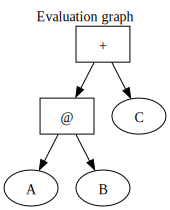

In [15]:
graphviz.Source(formula.graph)

In [16]:
more = formula + np.random.randn(10, 5)
more

Node(name='A @ B + C + ndarray(10, 5)', operation='+', operands=('A @ B + C', ndarray(10, 5)))

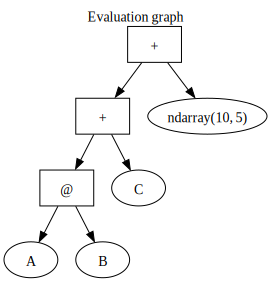

In [17]:
graphviz.Source(more.graph)

In [18]:
test = ad.einsum('ij,jk->ik', A, B)
test

einsum(subscripts='ij,jk->ik', A, B)

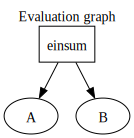

In [19]:
graphviz.Source(test.graph)

In [20]:
A_val = np.diag([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
B_val = np.ones((10, 5))

evaluation = test.evaluate_at(A=A_val, B=B_val)
print(f"f(A, B) = \n{evaluation}")
evaluation

f(A, B) = 
[[ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.]
 [10. 10. 10. 10. 10.]]


array([[ 1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.,  7.],
       [ 8.,  8.,  8.,  8.,  8.],
       [ 9.,  9.,  9.,  9.,  9.],
       [10., 10., 10., 10., 10.]])

In [21]:
grads = test.grads
print(f"df(A, B)/dA = \n{grads[A]}")
print(f"df(A, B)/dB = \n{grads[B]}")

df(A, B)/dA = 
[[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]]
df(A, B)/dB = 
[[ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.]
 [10. 10. 10. 10. 10.]]
